# Abstract
The objective of this assignment was to compare different regression techniques, namely Ordinary Least Squares(OLS),  Ridge, and Least Absolute Shrinkage and Selection Operator( LASSO) regression.


In [0]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import numpy as np

#Introduction
To compare the different regression techniques, the Boston Housing dataset was used. This dataset contains 13 parameters and outputs the expected price of a house in that area. <br>
These 13 parameters were :<br> 
Per capita crime rate by town(CRIM),<br>
Proportion of residential land zoned for lots over 25,000 sq.ft(ZN),<br> 
Proportion of non-retail business acres per town(INDUS),<br>
Charles River dummy variable(CHAS), <br>
Nitrogen oxides concentration in ppm(NOX),<br> 
Average number of rooms per dwelling(RM), <br>
Proportion of owner-occupied units built prior to 1940(AGE),<br> 
Weighted mean of distances to five Boston employment centres(DIS),<br> 
Index of accessibility to radial highways(RAD), <br>
Full-value property-tax rate per \$10,000(TAX),<br> 
Pupil-teacher ratio by town(PTRATIO), <br>
$1000(Bk - 0.63)^{2}$ where Bk is the proportion of blacks by town(B), and <br>
Lower status of the population(LTSTAT).

#Inference and Results
The inference of various tasks and the final result is given at the end of the colab notebook.

In [0]:
house_price = load_boston()
df = pd.DataFrame(house_price.data,columns = house_price.feature_names)
df['PRICE'] =  house_price.target
#print(df['PRICE'])

In [0]:
house_price.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [0]:
#training and test data are made here
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = ['PRICE']),df['PRICE'],test_size = 0.3)
print(x_train)

         CRIM    ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
48    0.25387   0.0   6.91   0.0  0.448  ...   3.0  233.0     17.9  396.90  30.81
370   6.53876   0.0  18.10   1.0  0.631  ...  24.0  666.0     20.2  392.05   2.96
24    0.75026   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  394.33  16.30
142   3.32105   0.0  19.58   1.0  0.871  ...   5.0  403.0     14.7  396.90  26.82
479  14.33370   0.0  18.10   0.0  0.614  ...  24.0  666.0     20.2  383.32  13.11
..        ...   ...    ...   ...    ...  ...   ...    ...      ...     ...    ...
164   2.24236   0.0  19.58   0.0  0.605  ...   5.0  403.0     14.7  395.11  11.64
277   0.06127  40.0   6.41   1.0  0.447  ...   4.0  254.0     17.6  393.45   4.16
384  20.08490   0.0  18.10   0.0  0.700  ...  24.0  666.0     20.2  285.83  30.63
225   0.52693   0.0   6.20   0.0  0.504  ...   8.0  307.0     17.4  382.00   4.63
49    0.21977   0.0   6.91   0.0  0.448  ...   3.0  233.0     17.9  396.90  16.20

[354 rows x 13 

OLS regression


In [0]:
#ols coefficients are calculated here, intercept is given as ols.intercept_
ols = LinearRegression().fit(x_train,y_train)
#print(ols.coef_)

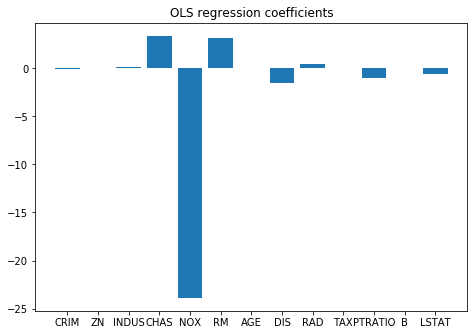

In [0]:
#bar graph is plotted here
ind = np.array(house_price.feature_names)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind,ols.coef_)
plt.title("OLS regression coefficients")
plt.show()

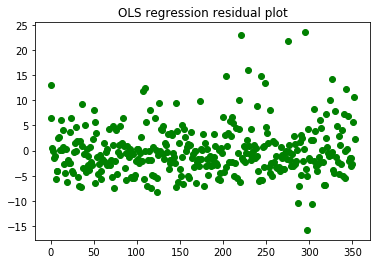

In [0]:
#residual for ols prediction
ans = []
y_train_ans = ols.predict(x_train)
ind = np.array([i for i in range(y_train.size)])
# print(type(y_train))
# print(type(y_train_ans)) y_train is of type pandas series and y_train is of type np array, we can access pandas series using iloc and not by [i]
for i in range(y_train.size):
  ans.append(y_train.iloc[i]-y_train_ans[i])
plt.scatter(y = ans, x = ind,color = 'green')
plt.title("OLS regression residual plot")
plt.show()
mean_training_error = []
mean_test_error = []
regression_type = []

In [0]:
#mean training error
mean_training_error.append(sklearn.metrics.mean_squared_error(ols.predict(x_train),y_train))
mean_test_error.append(sklearn.metrics.mean_squared_error(ols.predict(x_test),y_test))
regression_type.append("OLS")
print(sklearn.metrics.mean_squared_error(ols.predict(x_test),y_test))
print(sklearn.metrics.mean_squared_error(ols.predict(x_train),y_train))

16.916603909187064
24.70278269882637


#Ridge regression


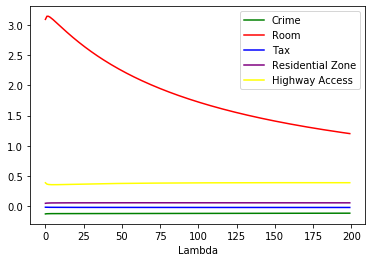

In [0]:
attr = []
crime = []
room = []
tax = []
rz = []
ha = []
ind = np.array([i for i in range(200)])
names = ['Crime','Room','Tax','Residential Zone','Highway Access']
for I in range(200):
  ridge = Ridge(alpha = float(I))
  ridge.fit(x_train,y_train)
  crime.append(ridge.coef_[0])#crime,room,tax,rz,ha
  room.append(ridge.coef_[5])
  tax.append(ridge.coef_[9])
  rz.append(ridge.coef_[1])
  ha.append(ridge.coef_[8])
attr.append(crime)
attr.append(room)
attr.append(tax)
attr.append(rz)
attr.append(ha)
c = ['green','red','blue','purple','yellow']
for i in range(5):
  plt.plot(ind,attr[i],color = c[i])
plt.legend(names)
plt.xlabel("Lambda")
plt.show()

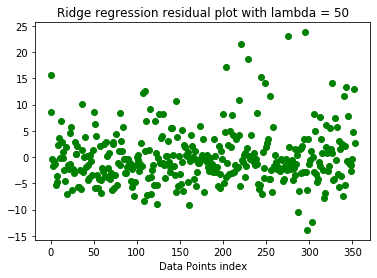

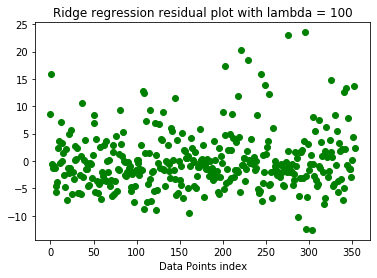

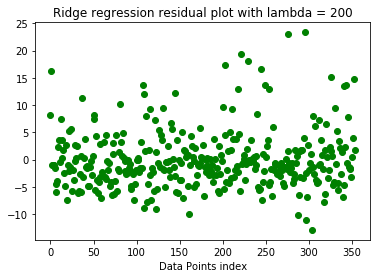

In [0]:
Alpha = [50,100,200]
for i in range(3):
  ans = []
  ridge = Ridge(alpha = Alpha[i])
  ridge.fit(x_train,y_train)
  y_train_ans = ridge.predict(x_train)
  ind = np.array([i for i in range(y_train.size)])
  for j in range(y_train.size):
    ans.append(y_train.iloc[j]-y_train_ans[j])
  plt.scatter(y = ans, x = ind,color = 'green')
  plt.title("Ridge regression residual plot with lambda = "+str(Alpha[i]))
  plt.xlabel("Data Points index")
  plt.show()
  mean_training_error.append(sklearn.metrics.mean_squared_error(y_train_ans,y_train))
  mean_test_error.append(sklearn.metrics.mean_squared_error(ridge.predict(x_test),y_test))
  regression_type.append("Ridge with lambda = "+str(Alpha[i]))

#LASSO regression


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4372.39253769229, tolerance: 3.234301822033898
  positive)


[]

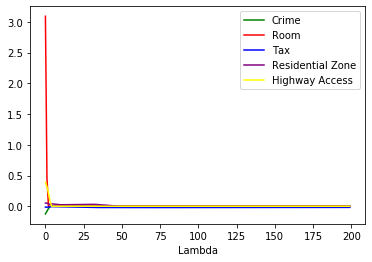

In [0]:
attr = []
crime = []
room = []
tax = []
rz = []
ha = []
ind = np.array([i for i in range(200)])
for I in range(200):
  lasso = Lasso(alpha = float(I))
  lasso.fit(x_train,y_train)
  crime.append(lasso.coef_[0])#crime,room,tax,rz,ha
  room.append(lasso.coef_[5])
  tax.append(lasso.coef_[9])
  rz.append(lasso.coef_[1])
  ha.append(lasso.coef_[8])
attr.append(crime)
attr.append(room)
attr.append(tax)
attr.append(rz)
attr.append(ha)
c = ['green','red','blue','purple','yellow']
for i in range(5):
  plt.plot(ind,attr[i],color = c[i])
plt.legend(names)
plt.xlabel("Lambda")
plt.plot()

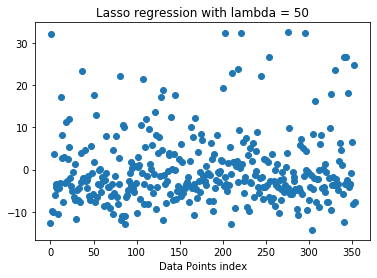

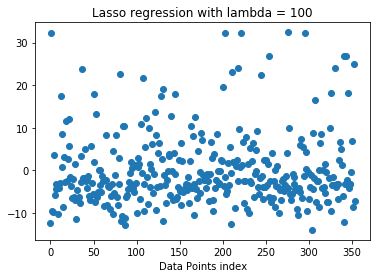

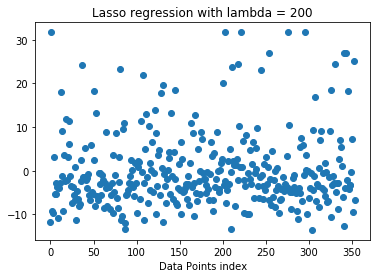

In [0]:
Alpha = [50,100,200]
for i in range(3):
  lasso = Lasso(alpha = Alpha[i])
  lasso.fit(x_train,y_train)
  ans = []
  ind = np.array([I for I in range(y_train.size)])
  y_train_ans = lasso.predict(x_train)
  for j in range(y_train.size):
    ans.append(y_train.iloc[j]-y_train_ans[j])
  plt.scatter(x = ind,y = ans)
  plt.title("Lasso regression with lambda = "+str(Alpha[i]))
  plt.xlabel("Data Points index")
  plt.show()
  mean_training_error.append(sklearn.metrics.mean_squared_error(y_train_ans,y_train))
  mean_test_error.append(sklearn.metrics.mean_squared_error(lasso.predict(x_test),y_test))
  regression_type.append("Lasso regression with lambda = "+str(Alpha[i]))

In [0]:
last = []
for i in range(7):
  last.append((regression_type[i],mean_training_error[i],mean_test_error[i]))
result = pd.DataFrame(last)
result.rename(columns = {0:"Regression Type",1:"Mean training error",2:"Mean test error"},inplace = True)

In [0]:
result

,Regression Type,Mean training error,Mean test error
0,OLS,24.702783,16.916604
1,Ridge with lambda = 50,26.853591,17.446108
2,Ridge with lambda = 100,27.445110,18.371764
3,Ridge with lambda = 200,28.275489,19.417136
4,Lasso regression with lambda = 50,72.018559,48.074249
5,Lasso regression with lambda = 100,72.922753,49.371313
6,Lasso regression with lambda = 200,74.589966,51.463629


#Inference from task 1
In this task, the dataset was split into training and test sets. OLS regression was used to analyze the dataset in this task. 
The coefficients obtained were plotted on a bar graph which can be found above.<br>
The sign of the coefficients tell us whether the coefficient has a positive or negative correlation with the output.


#Inference from task 2
OLS regression model is prone to overfitting. To tackle this problem, we use ridge regression which constraints the regression coefficients. Ridge regression takes a parameter lambda which is the regularization coefficient which is used to design a smoother curve. The plot of coefficients of parameters (Crime,room, residential zone, highway access and tax) is plotted as lambda is varied from 0 to 200 . This plot is given above.<br>
From the figure shown, we see that as lambda increases, the coefficient of parameter room decreases whereas the other coefficients remain nearly constant. This occurs as the penalty imposed results in a decrease in the value of all coefficients. 


#Inference from task 3
Another regression technique to tackle the problem of overfitting is LASSO regression.<br>

LASSO regression takes a parameter lambda. The resulting plot is given above as lambda is varied from 0 to 200.<br>

We see that the coefficient of parameter room decreases more rapidly as compared to ridge regression. The reason for this decrease in magnitude of coefficients is same as ridge regression.


#Inference from task 4
The residuals obtained show us that as the mean training/test error increases, the residuals for different training data deviates more from zero. As lambda increases, the error increases and thus the deviation of residuals from zero increases.<br>

The residual plots are given above.

#Inference from task 5 and results
We see that as the value of lambda increases, the training/test error increases. The mean squared error is used for analysis, and this value increases as the data is getting underfitted which does not accurately predict the data, which results in the decrease in accuracy. Thus the accuracy of ridge and LASSO regression falls drastically as lambda increases due to underfitting whereas OLS regression results in overfitting of the data.


#References
https://www.kaggle.com/c/boston-housing